In [133]:
import pandas as pd
import numpy as np
import sympy
from sympy.solvers.inequalities import reduce_rational_inequalities,reduce_inequalities
from itertools import chain
from collections import defaultdict
from IPython.display import display

from sympy.parsing.sympy_parser import parse_expr
from sympy.parsing.sympy_parser import standard_transformations
from sympy.printing.mathml import print_mathml

from IPython.display import display, Markdown, Latex
import os

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def make_symbols_positive(sym):
    return sympy.symbols("{}".format(sym),positive =True)

def make_symbols_function(sym):
    return sympy.symbols("{}".format(sym),cl)

def subs_function(target,list_):
    return sympy.simplify(target.subs(list_))

# Data_loading

In [3]:
file_list = os.listdir(r"C:\Users\Samsung\Desktop\Writing\Graduation\Solve\version_1")
file_list_xlsx = [f for f in file_list if f.endswith(".xlsx")]
#file_FB = [f for f in file_list_xlsx if f.contains("FB")]
#file_WH = [f for f in file_list_xlsx if f.contains("WH")]
#file_QD = [f for f in file_list_xlsx if f.contains("QD")]

In [4]:
file_name = [li.replace(".xlsx","") for li in file_list_xlsx]
file_name

['BDD_FB',
 'BDD_QD',
 'BDD_WH',
 'BDS_FB',
 'BDS_QD',
 'BDS_WH',
 'DD_FB',
 'DD_QD',
 'DD_WH',
 'First_FB',
 'First_QD',
 'First_WH',
 'SD_FB',
 'SD_QD',
 'SD_WH']

In [5]:
for fn in file_name:
    path_ = r"C:\Users\Samsung\Desktop\Writing\Graduation\Solve\version_1\{}.xlsx"
    globals() ["{}".format(fn)] = pd.read_excel(path_.format(fn),index_col=0,header=None)
    try:
        globals() ["{}".format(fn)] = globals() ["{}".format(fn)].rename(index={"profit_all":"pro_all"})
    except:
        pass

In [6]:
BDD_QD.head()

,1
0,
w,w
theta,-(delta_d*(alpha*delta_d + 2*beta*c*delta_s + ...
p,(3*alpha*delta_d + 2*beta*c*delta_s - beta*del...
p_w_theta,(alpha*delta_d - lambda*(beta*delta_d - beta*d...
q,(alpha*delta_d - 2*beta*c*delta_s + beta*delta...


## Str --> Latex 인식

In [7]:
alpha, beta, p, c, w, theta, Delta, delta_s, delta_d, lambda_ = make_symbols_positive("alpha, beta, p, c, w, theta , Delta, delta_s, delta_d, lambda")

In [8]:
parse_dic = {"alpha":alpha, "beta":beta, "p":p, "c":c,"w":w, "theta":theta,"Delta": Delta, "delta_s":delta_s, "delta_d":delta_d,"lambda_": lambda_ }

In [9]:
for fn in file_name:
    globals() ["{}".format(fn)][1] = globals() ["{}".format(fn)][1].map(lambda x: parse_expr(x.replace("^","**").replace("lambda","lambda_"),parse_dic))

In [10]:
BDD_QD[1]["pro_r"]

(alpha*delta_d + beta*delta_d*lambda - beta*delta_s*lambda - beta*delta_s*w)*(alpha*delta_d - 2*beta*c*delta_s + beta*delta_d*lambda - beta*delta_s*lambda + beta*delta_s*w)/(8*beta*delta_d)

In [11]:
BDD_QD[1]["pro_s"]

(alpha*delta_d - 2*beta*c*delta_s + beta*delta_d*lambda - beta*delta_s*lambda + beta*delta_s*w)**2/(16*beta*delta_d)

# Data combined by Case_

In [12]:
file_name

['BDD_FB',
 'BDD_QD',
 'BDD_WH',
 'BDS_FB',
 'BDS_QD',
 'BDS_WH',
 'DD_FB',
 'DD_QD',
 'DD_WH',
 'First_FB',
 'First_QD',
 'First_WH',
 'SD_FB',
 'SD_QD',
 'SD_WH']

In [13]:
case_  = ["First","DD","SD","BDD","BDS"]

In [14]:
for ca in case_:
    FB_ = globals ()["{}_FB".format(ca)].rename(columns={1:"FB"})
    WH_ = globals ()["{}_WH".format(ca)].rename(columns={1:"WH"})
    QD_ = globals ()["{}_QD".format(ca)].rename(columns={1:"QD"})
    globals ()["{}_all".format(ca)] = pd.concat([FB_,WH_,QD_],join="outer",axis=1)

In [15]:
First_all.head()

,FB,WH,QD
p,(alpha + beta*c)/(2*beta),(3*alpha + beta*c)/(4*beta),(3*alpha + 2*beta*c - beta*w)/(4*beta)
q,alpha/2 - beta*c/2,alpha/4 - beta*c/4,alpha/4 - beta*c/2 + beta*w/4
D,alpha/2 - beta*c/2,alpha/4 - beta*c/4,alpha/4 - beta*c/2 + beta*w/4
pro_all,(alpha - beta*c)**2/(4*beta),3*(alpha - beta*c)**2/(16*beta),(3*alpha**2 - 8*alpha*beta*c + 2*alpha*beta*w ...
h1,-2*beta,NaN,NaN


# data Concat

In [16]:
# concat 함수
def concat_all(target,case_):
    all_ = pd.DataFrame()
    for ca in case_:
        try:
            profit_all = pd.DataFrame(globals ()["{}_all".format(ca)].loc[target]).rename(columns={target:ca})
            all_ = pd.concat([all_,profit_all],axis=1)
        except:
            pass
    return all_

In [17]:
concat_all("pro_s",case_)

,First,DD,SD,BDD,BDS
FB,NaN,NaN,NaN,NaN,NaN
WH,(alpha - beta*c)**2/(8*beta),(-alpha*delta_d + beta*c - beta*delta_d*lambda...,delta_s*(alpha - beta*c)**2/(8*beta),(alpha*delta_d - beta*c*delta_s + beta*delta_d...,delta_s*(alpha - beta*c)**2/(8*beta)
QD,(alpha/4 - beta*c/2 + beta*w/4)*(alpha - 2*bet...,(alpha*delta_d - 2*beta*c + beta*delta_d*lambd...,delta_s*(alpha/4 - beta*c/2 + beta*w/4)*(alpha...,(alpha*delta_d - 2*beta*c*delta_s + beta*delta...,delta_s*(alpha/4 - beta*c/2 + beta*w/4)*(alpha...


In [18]:
c

c

# 1. Profit 크기 비교 

## 1.1 profit_all 

In [19]:
First_all.loc["pro_all"]

FB                         (alpha - beta*c)**2/(4*beta)
WH                      3*(alpha - beta*c)**2/(16*beta)
QD    (3*alpha**2 - 8*alpha*beta*c + 2*alpha*beta*w ...
Name: pro_all, dtype: object

In [20]:
profit_all = concat_all("pro_all",case_)
profit_all

,First,DD,SD,BDD,BDS
FB,(alpha - beta*c)**2/(4*beta),delta_d*(alpha - beta*c)**2/(4*beta),delta_s*(alpha - beta*c)**2/(4*beta),delta_d*(alpha - beta*c)**2/(4*beta),delta_s*(alpha - beta*c)**2/(4*beta)
WH,3*(alpha - beta*c)**2/(16*beta),3*(-alpha*delta_d + beta*c - beta*delta_d*lamb...,3*delta_s*(alpha - beta*c)**2/(16*beta),3*(alpha*delta_d - beta*c*delta_s + beta*delta...,3*delta_s*(alpha - beta*c)**2/(16*beta)
QD,(3*alpha**2 - 8*alpha*beta*c + 2*alpha*beta*w ...,(alpha*delta_d + beta*delta_d*lambda - beta*la...,delta_s*(3*alpha**2 - 8*alpha*beta*c + 2*alpha...,(alpha*delta_d + beta*delta_d*lambda - beta*de...,delta_s*(3*alpha**2 - 8*alpha*beta*c + 2*alpha...


In [21]:
for i in profit_all.columns:
    print(i)
    display(profit_all[i]["FB"])

First


(alpha - beta*c)**2/(4*beta)

DD


delta_d*(alpha - beta*c)**2/(4*beta)

SD


delta_s*(alpha - beta*c)**2/(4*beta)

BDD


delta_d*(alpha - beta*c)**2/(4*beta)

BDS


delta_s*(alpha - beta*c)**2/(4*beta)

- disruption 된 만큼 전체의 profit이 줄어든다. ( 당연한 결과 )

In [22]:
for i in profit_all.columns:
    print(i)
    display(profit_all[i]["WH"])

First


3*(alpha - beta*c)**2/(16*beta)

DD


3*(-alpha*delta_d + beta*c - beta*delta_d*lambda + beta*lambda)**2/(16*beta*delta_d)

SD


3*delta_s*(alpha - beta*c)**2/(16*beta)

BDD


3*(alpha*delta_d - beta*c*delta_s + beta*delta_d*lambda - beta*delta_s*lambda)**2/(16*beta*delta_d)

BDS


3*delta_s*(alpha - beta*c)**2/(16*beta)

- Supply disruption 일때, Demand 보다 적게 파는 손익( 기회비용)을 어떤 식으로 표시 할 수 있을까?
- BDD VS DD 비교: 만약에,delta_d가 동일하다고 생각 했을때, 공급망 전체의 손익이 양쪽의 disruption이 일어나는 BDD 에서 더 높게 나온다.
    이는 WH는 한계? 이야기?




### * Disruption 에 의한 피해 VS 공급망의 비효율에서 오는 피해 (비교 및 민감도 분석 필요하다)

In [23]:
for i in profit_all.columns:
    print(i)
    display(profit_all[i]["QD"])

First


(3*alpha**2 - 8*alpha*beta*c + 2*alpha*beta*w + 4*beta**2*c**2 - beta**2*w**2)/(16*beta)

DD


(alpha*delta_d + beta*delta_d*lambda - beta*lambda - beta*w)*(alpha*delta_d - 2*beta*c + beta*delta_d*lambda - beta*lambda + beta*w)/(8*beta*delta_d) + (alpha*delta_d - 2*beta*c + beta*delta_d*lambda - beta*lambda + beta*w)**2/(16*beta*delta_d)

SD


delta_s*(3*alpha**2 - 8*alpha*beta*c + 2*alpha*beta*w + 4*beta**2*c**2 - beta**2*w**2)/(16*beta)

BDD


(alpha*delta_d + beta*delta_d*lambda - beta*delta_s*lambda - beta*delta_s*w)*(alpha*delta_d - 2*beta*c*delta_s + beta*delta_d*lambda - beta*delta_s*lambda + beta*delta_s*w)/(8*beta*delta_d) + (alpha*delta_d - 2*beta*c*delta_s + beta*delta_d*lambda - beta*delta_s*lambda + beta*delta_s*w)**2/(16*beta*delta_d)

BDS


delta_s*(3*alpha**2 - 8*alpha*beta*c + 2*alpha*beta*w + 4*beta**2*c**2 - beta**2*w**2)/(16*beta)

### 1.2 a Gap of profit_all between First and each case

In [24]:
df_ = profit_all

propor_ = pd.DataFrame()
First_ = profit_all.loc[:,"First"]
Case_ = profit_all.drop(columns="First")
for i in Case_.columns:
    gap = pd.DataFrame(First_ - Case_[i])
    gap[0] = gap[0].map(lambda x: x.simplify())
    gap = gap.rename(columns={0:"First-{}".format(i)})
    propor_ = pd.concat([propor_,gap],axis=1)
propor_


,First-DD,First-SD,First-BDD,First-BDS
FB,(1 - delta_d)*(alpha - beta*c)**2/(4*beta),(1 - delta_s)*(alpha - beta*c)**2/(4*beta),(1 - delta_d)*(alpha - beta*c)**2/(4*beta),(1 - delta_s)*(alpha - beta*c)**2/(4*beta)
WH,3*(delta_d*(alpha - beta*c)**2 - (alpha*delta_...,3*(1 - delta_s)*(alpha - beta*c)**2/(16*beta),3*(delta_d*(alpha - beta*c)**2 - (alpha*delta_...,3*(1 - delta_s)*(alpha - beta*c)**2/(16*beta)
QD,(delta_d*(3*alpha**2 - 8*alpha*beta*c + 2*alph...,(3*alpha**2 - 8*alpha*beta*c + 2*alpha*beta*w ...,(delta_d*(3*alpha**2 - 8*alpha*beta*c + 2*alph...,(3*alpha**2 - 8*alpha*beta*c + 2*alpha*beta*w ...


In [25]:
# make gap maker
def gap_maker(df_):
    propor_ = pd.DataFrame()
    First_ = profit_all.loc[:,"First"]
    Case_ = profit_all.drop(columns="First")
    for i in Case_.columns:
        gap = pd.DataFrame(First_ - Case_[i])
        gap[0] = gap[0].map(lambda x: x.simplify())
        gap = gap.rename(columns={0:"First-{}".format(i)})
        propor_ = pd.concat([propor_,gap],axis=1)
    return propor_

In [26]:
gap_all = gap_maker(profit_all)
gap_all

,First-DD,First-SD,First-BDD,First-BDS
FB,(1 - delta_d)*(alpha - beta*c)**2/(4*beta),(1 - delta_s)*(alpha - beta*c)**2/(4*beta),(1 - delta_d)*(alpha - beta*c)**2/(4*beta),(1 - delta_s)*(alpha - beta*c)**2/(4*beta)
WH,3*(delta_d*(alpha - beta*c)**2 - (alpha*delta_...,3*(1 - delta_s)*(alpha - beta*c)**2/(16*beta),3*(delta_d*(alpha - beta*c)**2 - (alpha*delta_...,3*(1 - delta_s)*(alpha - beta*c)**2/(16*beta)
QD,(delta_d*(3*alpha**2 - 8*alpha*beta*c + 2*alph...,(3*alpha**2 - 8*alpha*beta*c + 2*alpha*beta*w ...,(delta_d*(3*alpha**2 - 8*alpha*beta*c + 2*alph...,(3*alpha**2 - 8*alpha*beta*c + 2*alpha*beta*w ...


In [27]:
for i in gap_all.columns:
    print(i)
    display(gap_all[i]["QD"])

First-DD


(delta_d*(3*alpha**2 - 8*alpha*beta*c + 2*alpha*beta*w + 4*beta**2*c**2 - beta**2*w**2) + (-3*alpha*delta_d + 2*beta*c - 3*beta*delta_d*lambda + 3*beta*lambda + beta*w)*(alpha*delta_d - 2*beta*c + beta*delta_d*lambda - beta*lambda + beta*w))/(16*beta*delta_d)

First-SD


(3*alpha**2 - 8*alpha*beta*c + 2*alpha*beta*w + 4*beta**2*c**2 - beta**2*w**2 - delta_s*(3*alpha**2 - 8*alpha*beta*c + 2*alpha*beta*w + 4*beta**2*c**2 - beta**2*w**2))/(16*beta)

First-BDD


(delta_d*(3*alpha**2 - 8*alpha*beta*c + 2*alpha*beta*w + 4*beta**2*c**2 - beta**2*w**2) + (-3*alpha*delta_d + 2*beta*c*delta_s - 3*beta*delta_d*lambda + 3*beta*delta_s*lambda + beta*delta_s*w)*(alpha*delta_d - 2*beta*c*delta_s + beta*delta_d*lambda - beta*delta_s*lambda + beta*delta_s*w))/(16*beta*delta_d)

First-BDS


(3*alpha**2 - 8*alpha*beta*c + 2*alpha*beta*w + 4*beta**2*c**2 - beta**2*w**2 - delta_s*(3*alpha**2 - 8*alpha*beta*c + 2*alpha*beta*w + 4*beta**2*c**2 - beta**2*w**2))/(16*beta)

## 1.2 개인 profit_ 비교

In [28]:
profit_s = concat_all("pro_s",case_)
profit_s

,First,DD,SD,BDD,BDS
FB,NaN,NaN,NaN,NaN,NaN
WH,(alpha - beta*c)**2/(8*beta),(-alpha*delta_d + beta*c - beta*delta_d*lambda...,delta_s*(alpha - beta*c)**2/(8*beta),(alpha*delta_d - beta*c*delta_s + beta*delta_d...,delta_s*(alpha - beta*c)**2/(8*beta)
QD,(alpha/4 - beta*c/2 + beta*w/4)*(alpha - 2*bet...,(alpha*delta_d - 2*beta*c + beta*delta_d*lambd...,delta_s*(alpha/4 - beta*c/2 + beta*w/4)*(alpha...,(alpha*delta_d - 2*beta*c*delta_s + beta*delta...,delta_s*(alpha/4 - beta*c/2 + beta*w/4)*(alpha...


In [29]:
profit_r = concat_all("pro_r",case_)
profit_r

,First,DD,SD,BDD,BDS
FB,NaN,NaN,NaN,NaN,NaN
WH,(alpha - beta*c)**2/(16*beta),(-alpha*delta_d + beta*c - beta*delta_d*lambda...,delta_s*(alpha - beta*c)**2/(16*beta),(alpha*delta_d - beta*c*delta_s + beta*delta_d...,delta_s*(alpha - beta*c)**2/(16*beta)
QD,(alpha - beta*w)*(alpha/4 - beta*c/2 + beta*w/...,(alpha*delta_d + beta*delta_d*lambda - beta*la...,delta_s*(alpha - beta*w)*(alpha/4 - beta*c/2 +...,(alpha*delta_d + beta*delta_d*lambda - beta*de...,delta_s*(alpha - beta*w)*(alpha/4 - beta*c/2 +...


In [30]:
df_ = profit_s

for i in df_.columns:
    print(i)
    display(df_[i]["WH"])

First


(alpha - beta*c)**2/(8*beta)

DD


(-alpha*delta_d + beta*c - beta*delta_d*lambda + beta*lambda)**2/(8*beta*delta_d)

SD


delta_s*(alpha - beta*c)**2/(8*beta)

BDD


(alpha*delta_d - beta*c*delta_s + beta*delta_d*lambda - beta*delta_s*lambda)**2/(8*beta*delta_d)

BDS


delta_s*(alpha - beta*c)**2/(8*beta)

- ### 의외로: Demand Disruption 일어 났을때도, Supplier의 이익에도 영향을 준다 ( 아마 가격의 영향이 큰 것 같다)

# 2. Profit sharing (s/all)

In [31]:
a_ = concat_all("pro_s",case_)/concat_all("pro_all",case_)

In [32]:
a_ = a_.apply(lambda x : x.map(lambda y: y.simplify()))
a_

,First,DD,SD,BDD,BDS
FB,nan,nan,nan,nan,nan
WH,2/3,2/3,2/3,2/3,2/3
QD,(-alpha + 2*beta*c - beta*w)/(-3*alpha + 2*bet...,(alpha*delta_d - 2*beta*c + beta*delta_d*lambd...,(-alpha + 2*beta*c - beta*w)/(-3*alpha + 2*bet...,(alpha*delta_d - 2*beta*c*delta_s + beta*delta...,(-alpha + 2*beta*c - beta*w)/(-3*alpha + 2*bet...


In [33]:
for i in a_.columns:
    print(i)
    display(a_[i]["QD"])

First


(-alpha + 2*beta*c - beta*w)/(-3*alpha + 2*beta*c + beta*w)

DD


(alpha*delta_d - 2*beta*c + beta*delta_d*lambda - beta*lambda + beta*w)/(3*alpha*delta_d - 2*beta*c + 3*beta*delta_d*lambda - 3*beta*lambda - beta*w)

SD


(-alpha + 2*beta*c - beta*w)/(-3*alpha + 2*beta*c + beta*w)

BDD


(alpha*delta_d - 2*beta*c*delta_s + beta*delta_d*lambda - beta*delta_s*lambda + beta*delta_s*w)/(3*alpha*delta_d - 2*beta*c*delta_s + 3*beta*delta_d*lambda - 3*beta*delta_s*lambda - beta*delta_s*w)

BDS


(-alpha + 2*beta*c - beta*w)/(-3*alpha + 2*beta*c + beta*w)

- WH 는 어떠한 상황에도 동일하게 supplier's profit share 은 동일하다. 
- QD 는, supply disruption 일때 supplier' profit share 정도를 유지 시켜준다.

# Numerical Anal

In [34]:
First_all.index

Index(['p', 'q', 'D', 'pro_all', 'h1', 'w', 'p_w', 'S', 'T', 'pro_r', 'pro_s',
       'h1_r_p', 'h1_s_w', 'theta', 'p_w_theta', 'h1_s_th', 'h2_s'],
      dtype='object')

In [35]:
round(First_all["WH"]["p"].subs([(alpha,1200),(beta,7)]).subs([(c,50)]),2)

141.07

In [36]:
round(First_all["WH"]["w"].subs([(alpha,1200),(beta,7)]).subs([(c,50)]),2)

110.71

In [37]:
First_all["WH"]

p                (3*alpha + beta*c)/(4*beta)
q                         alpha/4 - beta*c/4
D                         alpha/4 - beta*c/4
pro_all      3*(alpha - beta*c)**2/(16*beta)
h1                                       NaN
w                  (alpha + beta*c)/(2*beta)
p_w                (alpha + beta*w)/(2*beta)
S                         alpha/4 - beta*c/4
T                  (alpha + beta*c)/(2*beta)
pro_r          (alpha - beta*c)**2/(16*beta)
pro_s           (alpha - beta*c)**2/(8*beta)
h1_r_p                               -2*beta
h1_s_w                                 -beta
theta                                    NaN
p_w_theta                                NaN
h1_s_th                                  NaN
h2_s                                     NaN
Name: WH, dtype: object

In [38]:
parse_dic

{'alpha': alpha,
 'beta': beta,
 'p': p,
 'c': c,
 'w': w,
 'theta': theta,
 'Delta': Delta,
 'delta_s': delta_s,
 'delta_d': delta_d,
 'lambda_': lambda}

In [39]:
# 기본적인
# basic setting ( w= WH에서 alpha, beta,c 넣어서 나온값)
parameter_test = [(alpha,1200),
             (beta,7),
            (c,50),
            (w,100),
            (lambda_,60)
                 ]
parameter_test_2 = [(alpha,1200),
             (beta,7),
            (c,50),
            (w,100),
            (lambda_,60),
                 (theta,0.0461)]


In [ ]:
parameter_test = [(alpha,1200),
             (beta,7),
            (c,50),
            (w,100),
            (epsilon,60)
                 ]


In [40]:
def subs_lambda(y,params):
    try:
        out_ = y.subs(params)
        try:
            out_ = round(out_,3)
        except:
            pass
    except:
        out_ = 0
    return out_

In [41]:
def apply_num(df,para_list):
    return df.apply(lambda x : x.map(lambda y: subs_lambda(y,para_list)))

In [42]:
First_num = apply_num(First_all,parameter_test)
First_num

,FB,WH,QD
p,110.714,141.071,128.571
q,425,212.500,300
D,425,212.500,300
pro_all,25803.571,19352.679,23571.429
h1,-14,0,0
w,0,110.714,100
p_w,0,135.714,0
S,0,212.500,300
T,0,110.714,92.857
pro_r,0,6450.893,10714.286


In [43]:
First_num = apply_num(First_all,parameter_test_2)
First_num

,FB,WH,QD
p,110.714,141.071,128.571
q,425,212.500,300
D,425,212.500,300
pro_all,25803.571,19352.679,23571.429
h1,-14,0,0
w,0,110.714,100
p_w,0,135.714,0
S,0,212.500,300
T,0,110.714,92.857
pro_r,0,6450.893,10714.286


In [44]:
DD_num = apply_num(DD_all,parameter_test)
DD_num

,FB,WH,QD
p,110.714,(3180*delta_d + 770)/(28*delta_d),(3180*delta_d + 420)/(28*delta_d)
q,425,(1620*delta_d - 770)/(4*delta_d),(1620*delta_d - 420)/(4*delta_d)
D,425*delta_d,405*delta_d - 385/2,405*delta_d - 105
pro_all,180625*delta_d/7,3*(770 - 1620*delta_d)**2/(112*delta_d),(1620*delta_d - 1120)*(1620*delta_d - 420)/(56...
h1,-14*delta_d,0,0
w,0,810*delta_d/7 - 5,100
p_w,0,(780*delta_d + 1120)/(14*delta_d),0
S,0,(1620*delta_d - 770)/(4*delta_d),(1620*delta_d - 420)/(4*delta_d)
T,0,810*delta_d/7 - 5,405*delta_d/7 + 35
pro_r,0,(770 - 1620*delta_d)**2/(112*delta_d),(1620*delta_d - 1120)*(1620*delta_d - 420)/(56...


## profit_all

In [74]:
def parameter_set(lam,del_d,del_s):
    parameter_basic = [
    (alpha,1200),
    (beta,7),
    (c,50),
    (w,120),
    (lambda_,lam),
    (delta_d,del_d),
    (delta_s,del_s)]
    return parameter_basic  

In [96]:
# 기본적인
# basic setting ( w= WH에서 alpha, beta,c 넣어서 나온값)
parameter_test = parameter_set(10,0.8,0.8)
parameter_test_2 = parameter_set(10,0.8,0.7)
parameter_test_3 = parameter_set(10,0.7,0.8)
parameter_test_4 = parameter_set(0,0.8,0.8)


In [97]:
profit_all = concat_all("pro_all",case_)
profit_all

,First,DD,SD,BDD,BDS
FB,(alpha - beta*c)**2/(4*beta),delta_d*(alpha - beta*c)**2/(4*beta),delta_s*(alpha - beta*c)**2/(4*beta),delta_d*(alpha - beta*c)**2/(4*beta),delta_s*(alpha - beta*c)**2/(4*beta)
WH,3*(alpha - beta*c)**2/(16*beta),3*(-alpha*delta_d + beta*c - beta*delta_d*lamb...,3*delta_s*(alpha - beta*c)**2/(16*beta),3*(alpha*delta_d - beta*c*delta_s + beta*delta...,3*delta_s*(alpha - beta*c)**2/(16*beta)
QD,(3*alpha**2 - 8*alpha*beta*c + 2*alpha*beta*w ...,(alpha*delta_d + beta*delta_d*lambda - beta*la...,delta_s*(3*alpha**2 - 8*alpha*beta*c + 2*alpha...,(alpha*delta_d + beta*delta_d*lambda - beta*de...,delta_s*(3*alpha**2 - 8*alpha*beta*c + 2*alpha...


In [115]:
profit_all_num = apply_num(profit_all,parameter_test)
profit_all_num.drop(columns=["BDD","BDS"])

,First,DD,SD
FB,25803.571,20642.857,20642.857
WH,19352.679,11893.393,15482.143
QD,24646.429,15732.455,19717.143


In [99]:
# parameter test 2 는 SD 와 BDS 비교가 적당하다. ( parameter setting 자체가 DD < SD 이기 때문에)
# BDD 는 없는셈
profit_all_num = apply_num(profit_all,parameter_test_2)
profit_all_num.drop(columns="BDD")

,First,DD,SD,BDS
FB,25803.571,20642.857,18062.500,18062.500
WH,19352.679,11893.393,13546.875,13546.875
QD,24646.429,15732.455,17252.500,17252.500


In [100]:
# parameter test 3 는 DD 와 BDD 비교가 적당하다. ( parameter setting 자체가 DD > SD 이기 때문에)
# BDS 는 없는셈
profit_all_num = apply_num(profit_all,parameter_test_3)
profit_all_num.drop(columns="BDS")

,First,DD,SD,BDD
FB,25803.571,18062.500,20642.857,18062.500
WH,19352.679,8416.875,15482.143,11701.875
QD,24646.429,11216.875,19717.143,15271.875


### supplier profit

In [116]:
DF_ = concat_all("pro_s",case_)

In [117]:
DF_

,First,DD,SD,BDD,BDS
FB,NaN,NaN,NaN,NaN,NaN
WH,(alpha - beta*c)**2/(8*beta),(-alpha*delta_d + beta*c - beta*delta_d*lambda...,delta_s*(alpha - beta*c)**2/(8*beta),(alpha*delta_d - beta*c*delta_s + beta*delta_d...,delta_s*(alpha - beta*c)**2/(8*beta)
QD,(alpha/4 - beta*c/2 + beta*w/4)*(alpha - 2*bet...,(alpha*delta_d - 2*beta*c + beta*delta_d*lambd...,delta_s*(alpha/4 - beta*c/2 + beta*w/4)*(alpha...,(alpha*delta_d - 2*beta*c*delta_s + beta*delta...,delta_s*(alpha/4 - beta*c/2 + beta*w/4)*(alpha...


In [118]:
DF_num = apply_num(DF_,parameter_test)
DF_num.drop(columns=["BDD","BDS"])

,First,DD,SD
FB,0,0,0
WH,12901.786,7928.929,10321.429
QD,16032.143,13162.902,12825.714


In [104]:
# parameter test 2 는 SD 와 BDS 비교가 적당하다. ( parameter setting 자체가 DD < SD 이기 때문에)
# BDD는 없는 것
DF_num = apply_num(DF_,parameter_test_2)
DF_num.drop(columns="BDD")

,First,DD,SD,BDS
FB,0,0,0,0
WH,12901.786,7928.929,9031.250,9031.250
QD,16032.143,13162.902,11222.500,11222.500


In [105]:
# parameter test 3 는 DD 와 BDD 비교가 적당하다. ( parameter setting 자체가 DD > SD 이기 때문에)
# BDS 는 없는것
DF_num = apply_num(DF_,parameter_test_3)
DF_num.drop(columns="BDS")

,First,DD,SD,BDD
FB,0,0,0,0
WH,12901.786,5611.250,10321.429,7801.250
QD,16032.143,11730.625,12825.714,11390.625


In [106]:
DF_num = apply_num(DF_,parameter_test_4)
DF_num

,First,DD,SD,BDD,BDS
FB,0,0,0,0,0
WH,12901.786,8305.804,10321.429,10321.429,10321.429
QD,16032.143,13504.464,12825.714,12825.714,12825.714


### retailer profit

In [119]:
DF_ = concat_all("pro_r",case_)

In [120]:
DF_

,First,DD,SD,BDD,BDS
FB,NaN,NaN,NaN,NaN,NaN
WH,(alpha - beta*c)**2/(16*beta),(-alpha*delta_d + beta*c - beta*delta_d*lambda...,delta_s*(alpha - beta*c)**2/(16*beta),(alpha*delta_d - beta*c*delta_s + beta*delta_d...,delta_s*(alpha - beta*c)**2/(16*beta)
QD,(alpha - beta*w)*(alpha/4 - beta*c/2 + beta*w/...,(alpha*delta_d + beta*delta_d*lambda - beta*la...,delta_s*(alpha - beta*w)*(alpha/4 - beta*c/2 +...,(alpha*delta_d + beta*delta_d*lambda - beta*de...,delta_s*(alpha - beta*w)*(alpha/4 - beta*c/2 +...


In [121]:
DF_num = apply_num(DF_,parameter_test)
DF_num.drop(columns=["BDD","BDS"])

,First,DD,SD
FB,0,0,0
WH,6450.893,3964.464,5160.714
QD,8614.286,2569.554,6891.429


In [110]:
# parameter test 2 는 SD 와 BDS 비교가 적당하다. ( parameter setting 자체가 DD < SD 이기 때문에)
# BDD는 없는 것
DF_num = apply_num(DF_,parameter_test_2)
DF_num.drop(columns="BDD")

,First,DD,SD,BDS
FB,0,0,0,0
WH,6450.893,3964.464,4515.625,4515.625
QD,8614.286,2569.554,6030.00000000000,6030.00000000000


In [111]:
# parameter test 3 는 DD 와 BDD 비교가 적당하다. ( parameter setting 자체가 DD > SD 이기 때문에)
# BDS 는 없는것
DF_num = apply_num(DF_,parameter_test_3)
DF_num.drop(columns="BDS")

,First,DD,SD,BDD
FB,0,0,0,0
WH,6450.893,2805.625,5160.714,3900.625
QD,8614.286,-513.750,6891.429,3881.250


In [112]:
# parameter test 4 = lambda = 0 일때 ( 즉 추가 비용이 없을때,)

DF_num = apply_num(DF_,parameter_test_4)
DF_num

,First,DD,SD,BDD,BDS
FB,0,0,0,0,0
WH,6450.893,4152.902,5160.714,5160.714,5160.714
QD,8614.286,2946.429,6891.429,6891.429,6891.429


### delta _s ,d 모두 동일하고, 처리비용 없어도, DD가 SD 보다 좋지 않다.

# Sharing

In [122]:
a_ = concat_all("pro_s",case_)/concat_all("pro_all",case_)

In [123]:
a_ = a_.apply(lambda x : x.map(lambda y: y.simplify()))
DF_ = a_
DF_

,First,DD,SD,BDD,BDS
FB,nan,nan,nan,nan,nan
WH,2/3,2/3,2/3,2/3,2/3
QD,(-alpha + 2*beta*c - beta*w)/(-3*alpha + 2*bet...,(alpha*delta_d - 2*beta*c + beta*delta_d*lambd...,(-alpha + 2*beta*c - beta*w)/(-3*alpha + 2*bet...,(alpha*delta_d - 2*beta*c*delta_s + beta*delta...,(-alpha + 2*beta*c - beta*w)/(-3*alpha + 2*bet...


In [124]:
DF_num = apply_num(DF_,parameter_test)
DF_num.drop(columns=["BDD","BDS"])

,First,DD,SD
FB,nan,nan,nan
WH,0.667,0.667,0.667
QD,0.650,0.837,0.650


In [125]:
# parameter test 2 는 SD 와 BDS 비교가 적당하다. ( parameter setting 자체가 DD < SD 이기 때문에)
# BDD는 없는 것
DF_num = apply_num(DF_,parameter_test_2)
DF_num.drop(columns=["BDD"])

,First,DD,SD,BDS
FB,nan,nan,nan,nan
WH,0.667,0.667,0.667,0.667
QD,0.650,0.837,0.650,0.650


In [126]:
# parameter test 3 는 DD 와 BDD 비교가 적당하다. ( parameter setting 자체가 DD > SD 이기 때문에)
# BDS 는 없는것
DF_num = apply_num(DF_,parameter_test_3)
DF_num.drop(columns=["BDS"])

,First,DD,SD,BDD
FB,nan,nan,nan,nan
WH,0.667,0.667,0.667,0.667
QD,0.650,1.046,0.650,0.746


In [67]:
# parameter test 4 = lambda = 0 일때 ( 즉 추가 비용이 없을때,)

DF_num = apply_num(DF_,parameter_test_4)
DF_num

,First,DD,SD,BDD,BDS
FB,nan,nan,nan,nan,nan
WH,0.667,0.667,0.667,0.667,0.667
QD,0.545,0.649,0.545,0.545,0.545


# Profit Comparison

In [127]:
profit_all = concat_all("pro_all",case_)
profit_s = concat_all("pro_s",case_)
profit_r = concat_all("pro_r",case_)


## DD = SD

In [146]:
# DD = SD
para_ = parameter_test
all_num = apply_num(profit_all,para_).drop(columns=["BDD","BDS"])
all_s = apply_num(profit_s,para_).drop(columns=["BDD","BDS"],index="FB")
all_s["index"] = "supplier"
all_s["Contract"] = all_s.index
all_r = apply_num(profit_r,para_).drop(columns=["BDD","BDS"],index="FB")
all_r["index"] = "retailer"
all_r["Contract"] = all_r.index
all_ = pd.concat([all_r,all_s]).reset_index()
all_

,level_0,First,DD,SD,index,Contract
0,WH,6450.893,3964.464,5160.714,retailer,WH
1,QD,8614.286,2569.554,6891.429,retailer,QD
2,WH,12901.786,7928.929,10321.429,supplier,WH
3,QD,16032.143,13162.902,12825.714,supplier,QD


Text(0.5, 1.0, 'SD')

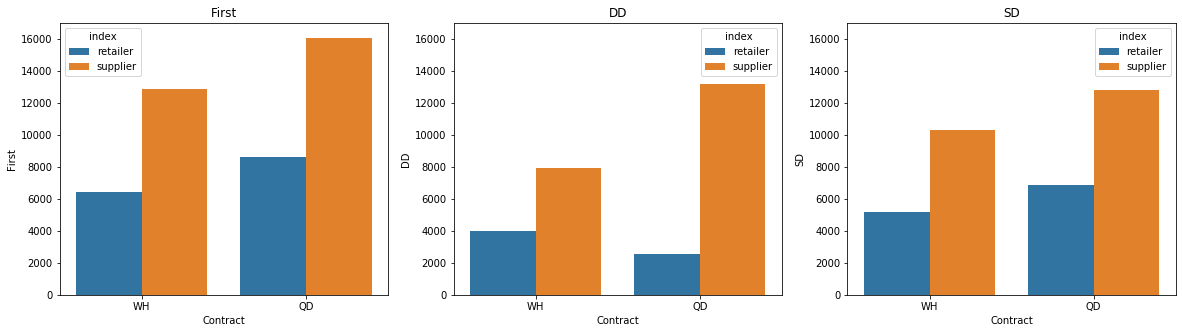

In [156]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.barplot(x="Contract",y="First",hue="index",data=all_)
plt.ylim([0,17000])
plt.title("First")
plt.subplot(1,3,2)
sns.barplot(x="Contract",y="DD",hue="index",data=all_)
plt.ylim([0,17000])
plt.title("DD")
plt.subplot(1,3,3)
sns.barplot(x="Contract",y="SD",hue="index",data=all_)
plt.ylim([0,17000])
plt.title("SD")

## DD < SD

In [264]:
# DD = SD
para_ = parameter_test_2
all_num = apply_num(profit_all,para_).drop(columns=["BDD"])
all_s = apply_num(profit_s,para_).drop(columns=["BDD"],index="FB")
all_s["index"] = "supplier"
all_s["Contract"] = all_s.index
all_r = apply_num(profit_r,para_).drop(columns=["BDD"],index="FB")
all_r["index"] = "retailer"
all_r["Contract"] = all_r.index
all_ = pd.concat([all_r,all_s]).reset_index()
all_

,level_0,First,DD,SD,BDS,index,Contract
0,WH,6450.893,3964.464,4515.625,4515.625,retailer,WH
1,QD,8614.286,2569.554,6030.00000000000,6030.00000000000,retailer,QD
2,WH,12901.786,7928.929,9031.250,9031.250,supplier,WH
3,QD,16032.143,13162.902,11222.500,11222.500,supplier,QD


,First,DD,SD,BDS
FB,25803.571,20642.857,18062.500,18062.500
WH,19352.679,11893.393,13546.875,13546.875
QD,24646.429,15732.455,17252.500,17252.500


Text(0.5, 1.0, 'BDS')

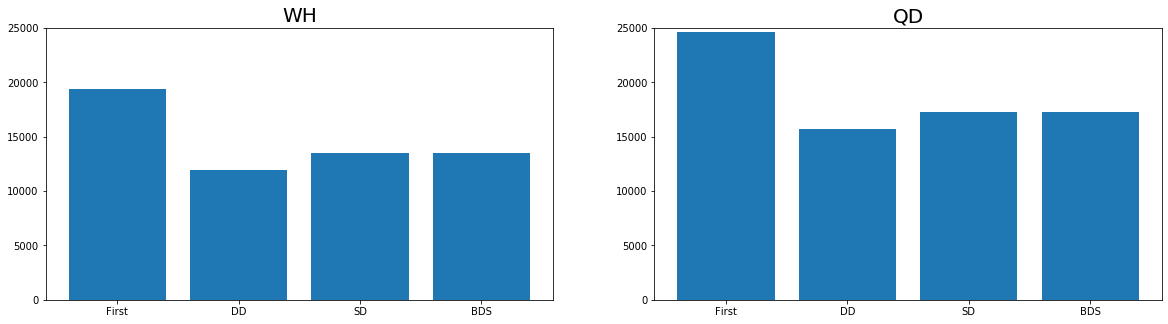

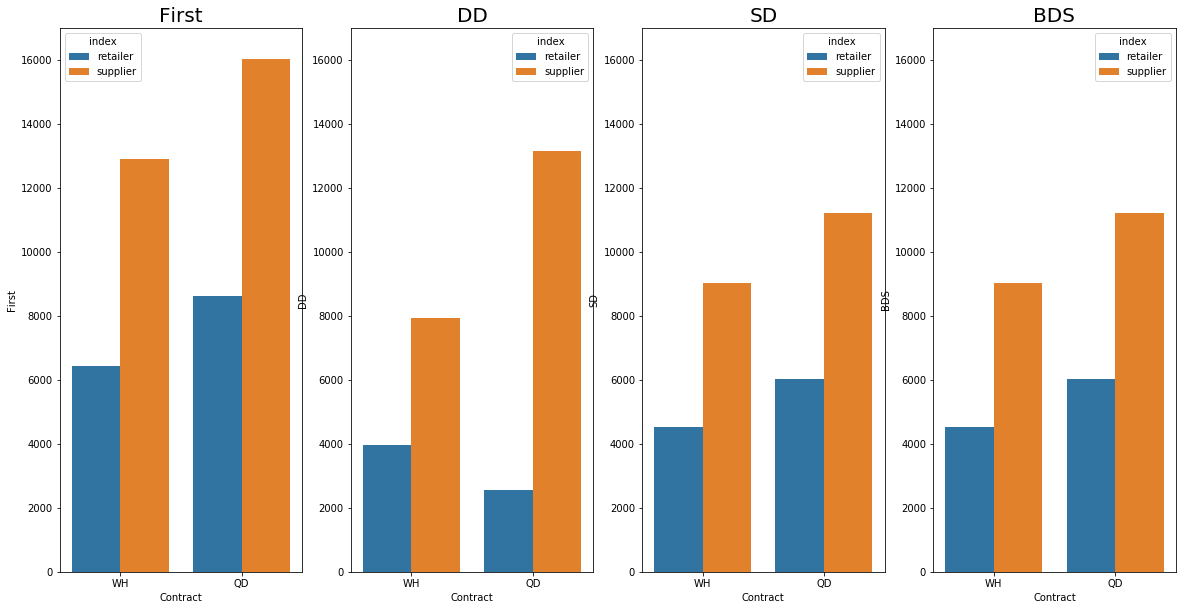

In [265]:
display(all_num)
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.bar(all_num.columns,all_num.loc["WH"])
plt.title("WH",fontsize=20)
plt.ylim([0,25000])
plt.subplot(1,2,2)
plt.bar(all_num.columns,all_num.loc["QD"])
plt.title("QD",fontsize=20)
plt.ylim([0,25000])


plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
sns.barplot(x="Contract",y="First",hue="index",data=all_)
plt.ylim([0,17000])
plt.title("First",fontsize=20)
plt.subplot(1,4,2)
sns.barplot(x="Contract",y="DD",hue="index",data=all_)
plt.ylim([0,17000])
plt.title("DD",fontsize=20)
plt.subplot(1,4,3)
sns.barplot(x="Contract",y="SD",hue="index",data=all_)
plt.ylim([0,17000])
plt.title("SD",fontsize=20)
plt.subplot(1,4,4)
sns.barplot(x="Contract",y="BDS",hue="index",data=all_)
plt.ylim([0,17000])
plt.title("BDS",fontsize=20)

### 해석
- Supply disruption에 따른 비용처리가 필요하다(기회비용)
    SD 와 BDS가 동일하게 나온다( Deamnd disruption 발생에 대한 비용 처리 필요)
    
- QD 가 WH 보다 좋다

In [280]:
DD_all.head()

,FB,WH,QD
p,(alpha + beta*c)/(2*beta),(3*alpha*delta_d + beta*c - beta*delta_d*lambd...,(3*alpha*delta_d + 2*beta*c - beta*delta_d*lam...
q,alpha/2 - beta*c/2,(alpha*delta_d - beta*c + beta*delta_d*lambda ...,(alpha*delta_d - 2*beta*c + beta*delta_d*lambd...
D,delta_d*(alpha/2 - beta*c/2),alpha*delta_d/4 - beta*c/4 + beta*delta_d*lamb...,alpha*delta_d/4 - beta*c/2 + beta*delta_d*lamb...
pro_all,delta_d*(alpha - beta*c)**2/(4*beta),3*(-alpha*delta_d + beta*c - beta*delta_d*lamb...,(alpha*delta_d + beta*delta_d*lambda - beta*la...
h1,-2*beta*delta_d,NaN,NaN


In [281]:
DD_all.loc["pro_all"]["QD"]

(alpha*delta_d + beta*delta_d*lambda - beta*lambda - beta*w)*(alpha*delta_d - 2*beta*c + beta*delta_d*lambda - beta*lambda + beta*w)/(8*beta*delta_d) + (alpha*delta_d - 2*beta*c + beta*delta_d*lambda - beta*lambda + beta*w)**2/(16*beta*delta_d)

## DD > SD

In [266]:
# DD = SD
para_ = parameter_test_3
all_num = apply_num(profit_all,para_).drop(columns=["BDS"])
all_s = apply_num(profit_s,para_).drop(columns=["BDS"],index="FB")
all_s["index"] = "supplier"
all_s["Contract"] = all_s.index
all_r = apply_num(profit_r,para_).drop(columns=["BDS"],index="FB")
all_r["index"] = "retailer"
all_r["Contract"] = all_r.index
all_ = pd.concat([all_r,all_s]).reset_index()
all_

,level_0,First,DD,SD,BDD,index,Contract
0,WH,6450.893,2805.625,5160.714,3900.625,retailer,WH
1,QD,8614.286,-513.750,6891.429,3881.250,retailer,QD
2,WH,12901.786,5611.250,10321.429,7801.250,supplier,WH
3,QD,16032.143,11730.625,12825.714,11390.625,supplier,QD


,First,DD,SD,BDD
FB,25803.571,18062.500,20642.857,18062.500
WH,19352.679,8416.875,15482.143,11701.875
QD,24646.429,11216.875,19717.143,15271.875


Text(0.5, 1.0, 'BDD')

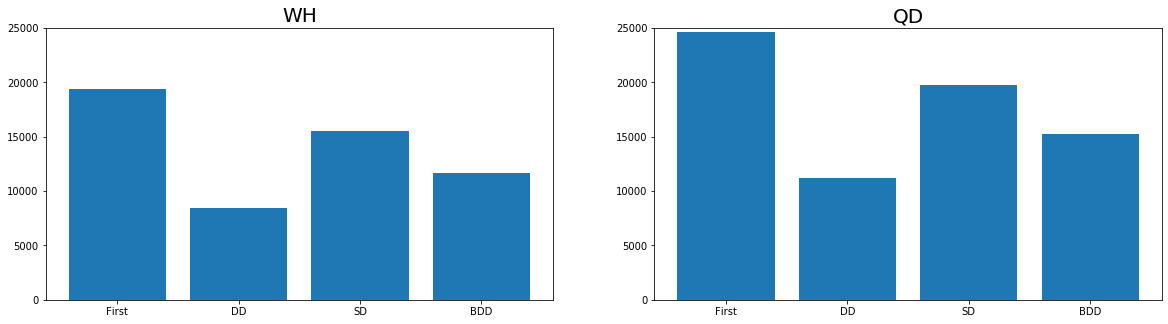

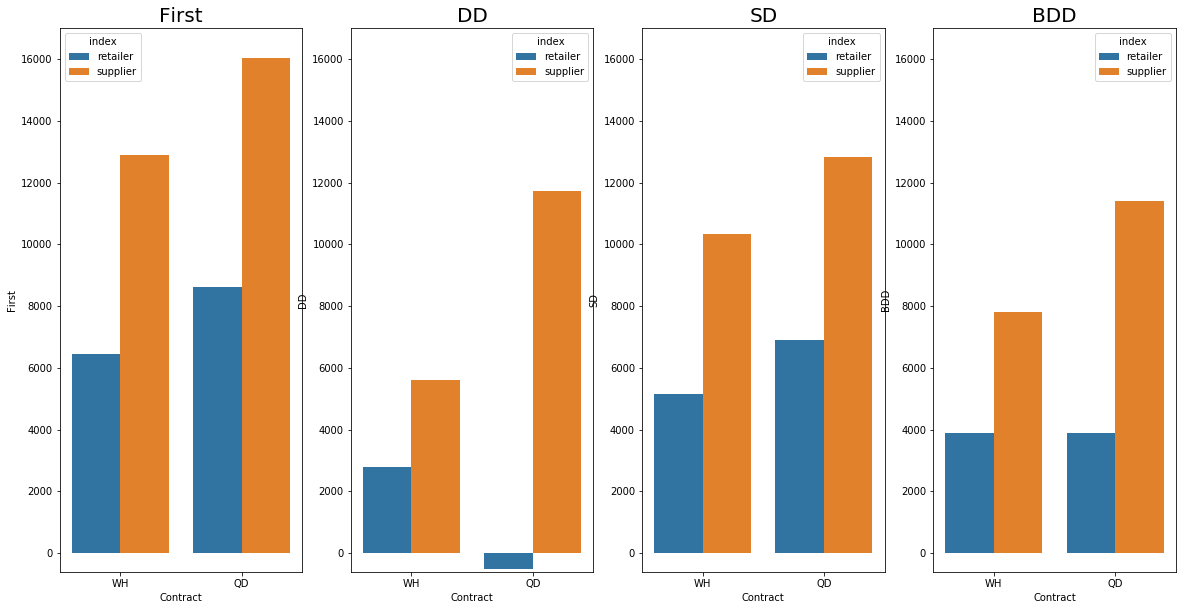

In [267]:
display(all_num)
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.bar(all_num.columns,all_num.loc["WH"])
plt.title("WH",fontsize=20)
plt.ylim([0,25000])
plt.subplot(1,2,2)
plt.bar(all_num.columns,all_num.loc["QD"])
plt.title("QD",fontsize=20)
plt.ylim([0,25000])

plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
p1 = sns.barplot(x="Contract",y="First",hue="index",data=all_)
plt.ylim([-600,17000])
plt.title("First",fontsize=20)
plt.subplot(1,4,2)
p2 = sns.barplot(x="Contract",y="DD",hue="index",data=all_)
plt.ylim([-600,17000])
plt.title("DD",fontsize=20)
plt.subplot(1,4,3)
p3 = sns.barplot(x="Contract",y="SD",hue="index",data=all_)
plt.ylim([-600,17000])
plt.title("SD",fontsize=20)
plt.subplot(1,4,4)
p4 = sns.barplot(x="Contract",y="BDD",hue="index",data=all_)
plt.ylim([-600,17000])
plt.title("BDD",fontsize=20)


### 해석
- DD : retailer 입장에서는 WH 가 QD 보다 좋다. (상황에 따라서 음수 값이 나올 수 도 있다.
- DD VS BDD : 오히려 retailer 입장에서는 DD와 SD 가 동시에 일어 났을때, 상황이 좋다
- BDD : 왜 retailer의 이익이 WH와 QD가 거의 동일한가?
  

In [209]:
BDD_all.loc["pro_r"]["QD"]

(alpha*delta_d + beta*delta_d*lambda - beta*delta_s*lambda - beta*delta_s*w)*(alpha*delta_d - 2*beta*c*delta_s + beta*delta_d*lambda - beta*delta_s*lambda + beta*delta_s*w)/(8*beta*delta_d)

In [208]:
BDD_all.loc["pro_r"]["WH"]

(alpha*delta_d - beta*c*delta_s + beta*delta_d*lambda - beta*delta_s*lambda)**2/(16*beta*delta_d)

In [206]:
(BDD_all.loc["pro_r"]["WH"] - BDD_all.loc["pro_r"]["QD"]).expand().simplify()

(-alpha**2*delta_d**2 + beta**2*delta_s**2*(c**2 - 2*c*lambda - 4*c*w - lambda**2 + 2*w**2) + beta*delta_d*(2*alpha*c*delta_s - 2*alpha*delta_d*lambda + 2*alpha*delta_s*lambda + 2*beta*c*delta_s*lambda - beta*delta_d*lambda**2 + 2*beta*delta_s*lambda**2))/(16*beta*delta_d)

In [207]:
(BDS_all.loc["pro_r"]["WH"] - BDS_all.loc["pro_r"]["QD"]).expand().simplify()

delta_s*(-alpha**2 + beta*(2*alpha*c + beta*c**2 - 4*beta*c*w + 2*beta*w**2))/(16*beta)

In [211]:
First_all.index

Index(['p', 'q', 'D', 'pro_all', 'h1', 'w', 'p_w', 'S', 'T', 'pro_r', 'pro_s',
       'h1_r_p', 'h1_s_w', 'theta', 'p_w_theta', 'h1_s_th', 'h2_s'],
      dtype='object')

# others Comparison

In [212]:
target = "p"
df_all = concat_all("p",case_)

## Price

In [214]:
# DD = SD
para_ = parameter_test
all_num = apply_num(df_all,para_)#.drop(columns=["BDD","BDS"])
all_num

,First,DD,SD,BDD,BDS
FB,110.714,110.714,110.714,110.714,110.714
WH,141.071,144.821,141.071,141.071,141.071
QD,123.571,122.946,123.571,123.571,123.571


In [258]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(float(height),4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=15)

,First,DD,SD,BDD,BDS
FB,110.714,110.714,110.714,110.714,110.714
WH,141.071,144.821,141.071,141.071,141.071
QD,123.571,122.946,123.571,123.571,123.571


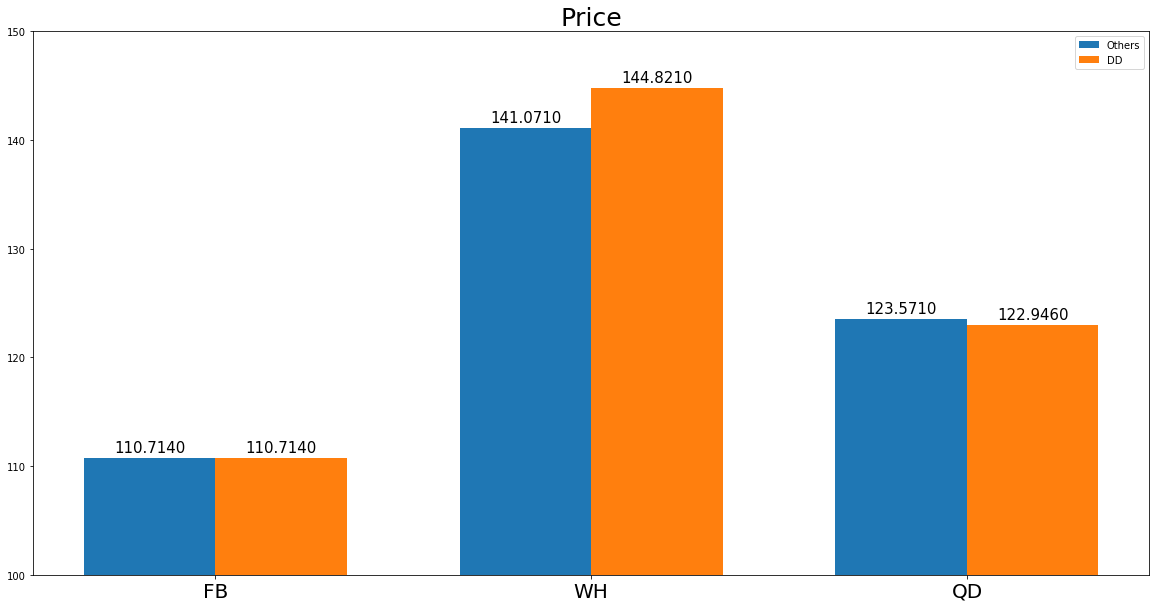

In [240]:
x = np.arange(len(all_num.index))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(20,10))
p1 = plt.bar(x - width/2, all_num["First"], width, label='Others')
p2 = plt.bar(x + width/2, all_num["DD"], width, label='DD')
plt.ylim([100,150])
ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(all_num.index,fontsize=20)
autolabel(p1)
autolabel(p2)
plt.title("Price",fontsize=25)
display(all_num)

### 해석
- 어떠한 상황에서도 FB의 price는 동일하다.
- WH는 DD 일때 가격을 상승 
- QD는 DD 일때 가격을 하락 (리더가 통제)

## Demand

In [241]:
target = "D"
df_all = concat_all(target,case_)

In [259]:
# DD = SD
para_ = parameter_test
all_num = apply_num(df_all,para_)#.drop(columns=["BDD","BDS"])
all_num

,First,DD,SD,BDD,BDS
FB,425,340.000000000000,340.000000000000,340.000000000000,340.000000000000
WH,212.500,149.000000000000,170.000000000000,170.000000000000,170.000000000000
QD,335,271.500,268.000000000000,268.000000000000,268.000000000000


,First,DD,SD,BDD,BDS
FB,425.0,340.0,340.0,340.0,340.0
WH,212.5,149.0,170.0,170.0,170.0
QD,335.0,271.5,268.0,268.0,268.0


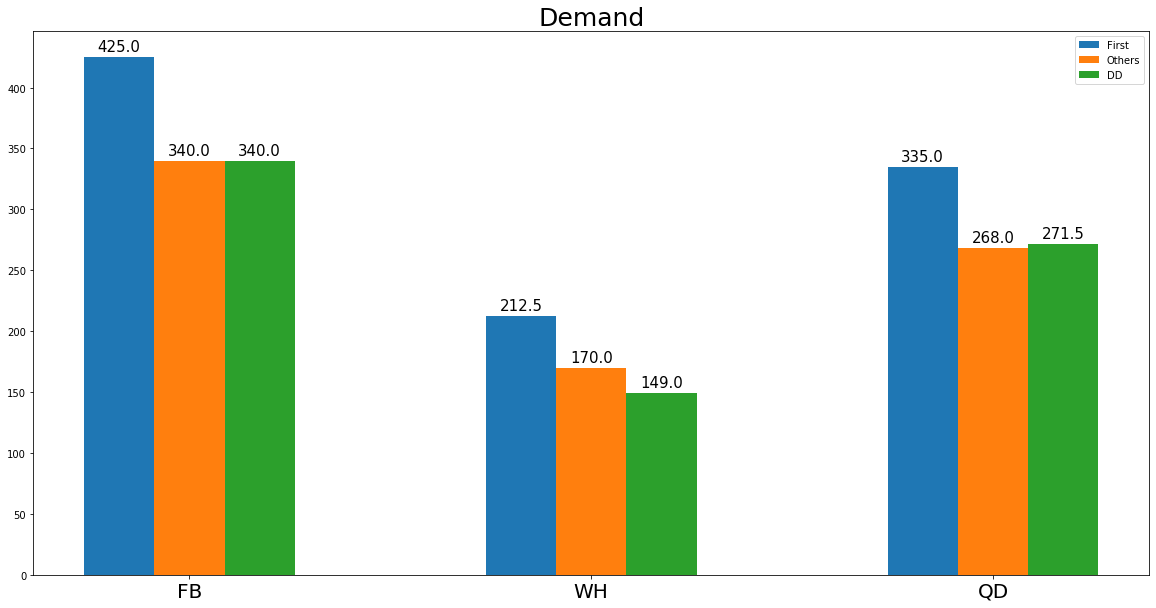

In [262]:
x = np.arange(len(all_num.index))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(20,10))
p1 = plt.bar(x - 1*(width/2), all_num["First"], width/2, label='First')
p2 = plt.bar(x , all_num["SD"], width/2, label='Others')
p3 = plt.bar(x + 1*(width/2), all_num["DD"], width/2, label='DD')

#plt.ylim([100,150])
ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(all_num.index,fontsize=20)
autolabel(p1)
autolabel(p2)
autolabel(p3)

plt.title("Demand",fontsize=25)
display(all_num.apply(lambda y: y.map(lambda x: float(x))))

### 해석
- First > Other > DD 순이다.
- 하지만 QD 일떄는 DD가 other 보다 높다.

## Supply - Demand

In [268]:
target = "D"
df_all = concat_all("S",case_) - concat_all("D",case_)

In [270]:
# DD = SD
para_ = parameter_test
all_num = apply_num(df_all,para_).drop(index=["FB"])
all_num

,First,DD,SD,BDD,BDS
WH,0,37.250,0,0,0
QD,0,67.875,0,0,0


,First,DD,SD,BDD,BDS
WH,0.0,37.250,0.0,0.0,0.0
QD,0.0,67.875,0.0,0.0,0.0


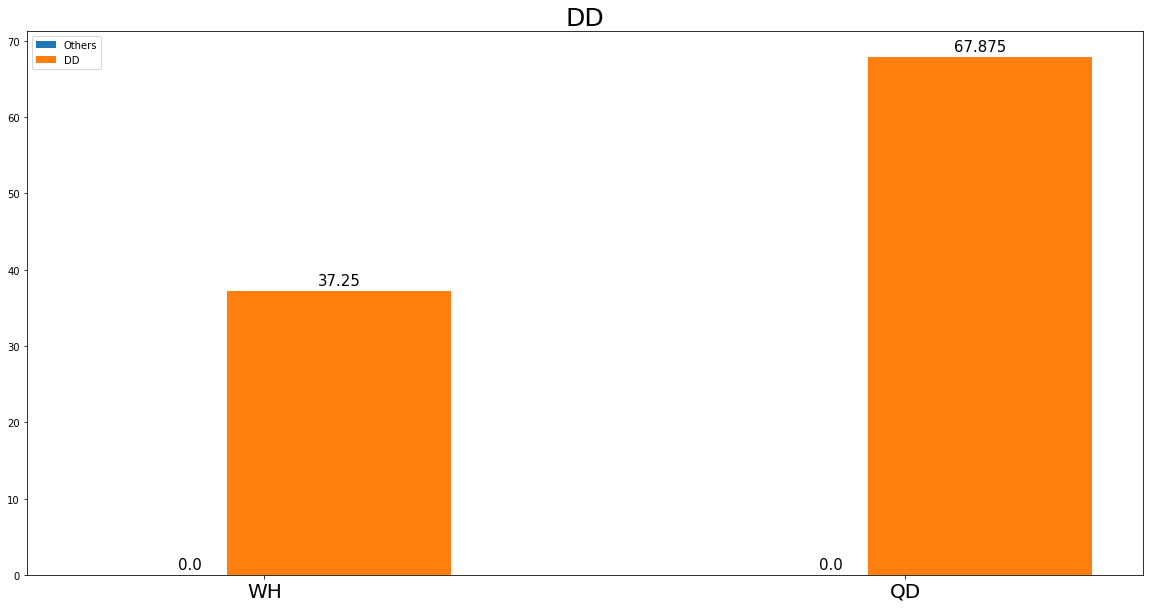

In [272]:

x = np.arange(len(all_num.index))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(20,10))
p1 = plt.bar(x - 1*(width/3), all_num["First"], width, label='Others')
p2 = plt.bar(x + 1*(width/3), all_num["DD"], width, label='DD')

#plt.ylim([100,150])
ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(all_num.index,fontsize=20)
autolabel(p1)
autolabel(p2)


plt.title("DD",fontsize=25)
display(all_num.apply(lambda y: y.map(lambda x: float(x))))

### 해석
- DD 일때, QD는 retialer 에게 좀 더 많은 상품을 구매하게 만든다( 필요 이상으로)


## T

In [273]:
target = "T"
df_all = concat_all("T",case_)

In [275]:
# DD = SD
para_ = parameter_test
all_num = apply_num(df_all,para_).drop(index=["FB"])
all_num

,First,DD,SD,BDD,BDS
WH,110.714,92.571,110.714,110.714,110.714
QD,97.857,88.786,97.857,97.857,97.857


,First,DD,SD,BDD,BDS
WH,110.714,92.571,110.714,110.714,110.714
QD,97.857,88.786,97.857,97.857,97.857


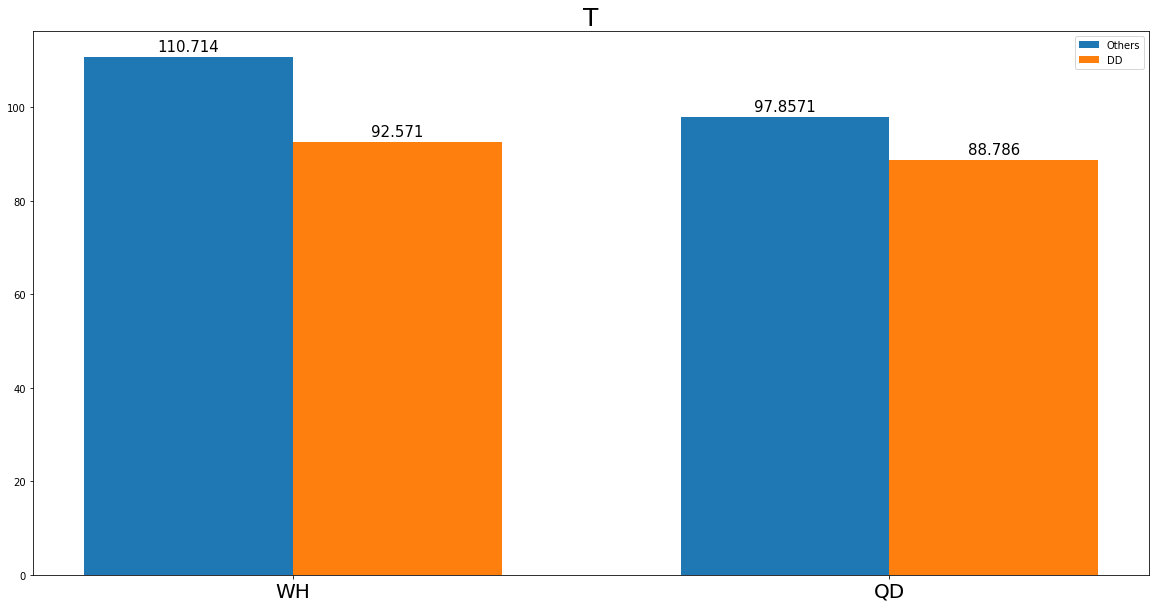

In [278]:
x = np.arange(len(all_num.index))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(20,10))
p1 = plt.bar(x - width/2, all_num["First"], width, label='Others')
p2 = plt.bar(x + width/2, all_num["DD"], width, label='DD')
#plt.ylim([100,150])
ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(all_num.index,fontsize=20)
autolabel(p1)
autolabel(p2)
plt.title("T",fontsize=25)
display(all_num)

### 해석
- 그래도 T는 QD가 적다